# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


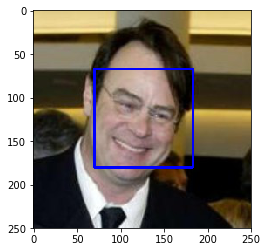

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
- The percentage of human face detected based on the code below is at 98%
- The face_detector falsely detect dog picture as human face at 17%

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

#face_detector(human_files_short[0])

ttlface = 0
ttlface_dog = 0
for i in range(len(human_files_short)):
    number_faces = face_detector(human_files_short[i])
    ttlface = ttlface + number_faces
    number_faces_in_dog = face_detector(dog_files_short[i])
    ttlface_dog = ttlface_dog + number_faces_in_dog
perc_face = ttlface/len(human_files_short)
perc_face_dog = ttlface_dog / len(dog_files_short)
print("total faces detected in human_files_short is", perc_face)
print("total faces detected in dog files short is ", perc_face_dog)


total faces detected in human_files_short is 0.98
total faces detected in dog files short is  0.17


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 100661244.52it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    preprocess = transforms.Compose([transforms.Resize((224,224)), 
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                              std =[0.229, 0.224, 0.225])])
    to_tensor = transforms.Compose([transforms.Resize((224, 224)),
                                   transforms.ToTensor()])
    cur_img = Image.open(img_path)
    
    img_tensor = to_tensor(cur_img)
    img_tensor.unsqueeze_(0)
    if use_cuda:
        img_tensor = img_tensor.cuda() 

    output = VGG16(img_tensor)
    if use_cuda:
        classidx = np.argmax(output.data)
    else:
        classidx = output.data.numpy().argmax()
    
    return classidx # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    dog_detected = False
    classidx = VGG16_predict(img_path)
    if (classidx >= 151 and classidx <= 268):
        dog_detected = True
    else:
        dog_detected = False
    return dog_detected # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
- Percentage of images in human_files_short detected dog is at 0%
- Percentage of images in dog_files_short detected dog is at 96%

In [40]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
#pint(VGG16)
#VGG16_predict(human_files_short[0])
#print(dog_detector(human_files_short[0]))
#VGG16_predict(dog_files_short[0])
#print(dog_detector(dog_files_short[0]))
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

ttlface = 0
ttlface_dog = 0
for i in range(len(human_files_short)):
    if (dog_detector(human_files_short[i])):
        ttlface = ttlface + 1
    if (dog_detector(dog_files_short[i])):
        ttlface_dog = ttlface_dog + 1

perc_face = ttlface/len(human_files_short)
perc_dog = ttlface_dog / len(dog_files_short)
print("total faces detected in human_files_short is", perc_face)
print("total faces detected in dog files short is ", perc_dog)


total faces detected in human_files_short is 0.0
total faces detected in dog files short is  0.96


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [9]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [10]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

data_transforms = {
    'train': transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.Resize((128,128)),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
        ]),
    'valid': transforms.Compose([
            transforms.Resize((128,128)),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
        ]),
    'test': transforms.Compose([
            #Higher scale-up for inception
            transforms.Resize((128,128)),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
        ]),
}

dsets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
             for x in ['train', 'valid', 'test']}
loaders_scratch = {x: torch.utils.data.DataLoader(dsets[x], batch_size = 50, shuffle = True)
                 for x in ['train', 'valid', 'test']}
dset_sizes = {x: len(dsets[x]) for x in ['train', 'valid', 'test']}
dset_classes = dsets['train'].classes

##checking if tensor load is good, looking at label

import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

dataiter = iter(loaders_scratch['train'])
image_tensor, labels = dataiter.next()

print(labels[0])
#print(image_tensor)
print(image_tensor.size())
imagenp = image_tensor[0].numpy()
imagenp.shape

tensor(80)
torch.Size([50, 3, 128, 128])


(3, 128, 128)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- The code works by resizing image to 128 X 128. This should be small enough to allow multiple level of tensors, but big enough not to omit details of various dog breeder
- The augmentation of training datasets are done by doing random Horizontal and Vertical Flip (transforms.RandomVerticalFlip and transforms.RandomHorizontalFlip). In addition, I do normalization usting transfroms.Normalize. The normalization takes values of (0.485, 0.456, 0.406), (0.229, 0.224, 0.225) as suggested by the documentation. 
- In later part of the code, I make sure to shuffle the datasets when loading the training set. This is because the files are sorted by alphabetical order of the Dog Breed. I also want to use batch size 50 to assure better variability of datasets during training process

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [11]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # convolutional layer (sees 128x128x3 image tensor)
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bnn1 = nn.BatchNorm2d(32)
        # convolutional layer (sees 64x64x32 tensor)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bnn2 = nn.BatchNorm2d(64)
        # convolutional layer (sees 32x32x64 tensor)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.bnn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.bnn4 = nn.BatchNorm2d(256)

        # convolutional layer (sees 16x16x128 tensor)
        # now, convolution is at 256x256X8
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (16*16*64 -> 500)
        self.fc1 = nn.Linear(256 * 8 * 8, 4096)
        # linear layer (500 -> 133)
        self.fc2 = nn.Linear(4096, 133)
#        self.fc4 = nn.Linear(512, 133)
        # dropout layer (p=0.)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(self.bnn1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.bnn2(x))
        x = self.pool(F.relu(self.conv3(x)))
        x = F.relu(self.bnn3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = F.relu(self.bnn4(x))

        # flatten image input
        x = x.view(-1, 256*8*8)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
#        x = F.relu(self.fc2(x))
        x = self.fc2(x)

        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

CNN architecture that I use is inspired by VGG16. I find that VGG16 is quite powerful to detect various images during transfer learning session. I notice that more filter of convolution seems to be necessary to detect various features of dog breed. In addition, the process of CNN architecture is also based on trial-and-error. In 5 first attempt, my accuracy on test data grows from 1%, 4%, 5%, 6% and 8%. The more layers of CNN I add, the accuracy increased, and so is number of nodes on the dense layer. The architecture is divided into 2 parts (CNN and dense layer)
- CNN layer of 4 layers of CNN. From image size 128X128, I use kernel size = 3 and padding 1. This transforms 3 RGB into 32 layer of CNN.  This is then followed by BatchNorm2D to normalize the output. I used ReLU function because it gave best performance based on my research. In addition, for each layer, I augment the filter from 32, 64, 128 and 258. After each layer, I did batchNorm and MaxPool. BatchNorm2d is able to reduce noise during training, and make my choice of algorithm SGD converges more quickly. Without batchnorm, I found that training loss is decreasing but validation is stuck. i used maxpool as 2 for this exercise
- Dense layer is 2 layer. I chose 4096 and 133 as the dense. These are again inspired by VGG16. I found on the VGG16, the last layer was at 4096. The last node is 133 asscoiated with number of dog breed in the dataset.

For clarity, I print the model in the implementation below

During training process, I also paid attention to learning rate. I found that learning rate 0.01 is too high while learning rate 0.001 converges too slowly. I settled on LR 0.005. I also chose batch size 50. I found that GPU is needed to run the training model. I experimented with several runs of GPU, after about 15 hours of GPU (8 iterations of models), I obtained the results that meets the 10% bar. My accuracy is at 16%. The biggest contributor that did the trick was BatchNorm2D feature.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [12]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.005)

# testing --- see what's the result on one iteration
print(model_scratch)
dataiter = iter(loaders_scratch['train'])
image_tensor, labels = dataiter.next()
if use_cuda == False:
    output_model = model_scratch(image_tensor)
    loss_check = criterion_scratch(output_model, labels)
    print("This is result from conv forward")
    print(output_model.size())
    print(loss_check)


Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16384, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [13]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            train_output = model(data)
            optimizer.zero_grad()
            loss = criterion(train_output, target)
            loss.backward()
            optimizer.step()            
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            valid_output = model(data)
            loss = criterion(valid_output, target)
            ## update the average validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss            
    # return trained model
    return model



In [14]:
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))
# train the model
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')




Epoch: 1 	Training Loss: 4.872747 	Validation Loss: 4.834263
Validation loss decreased (inf --> 4.834263).  Saving model ...
Epoch: 2 	Training Loss: 4.812536 	Validation Loss: 4.797908
Validation loss decreased (4.834263 --> 4.797908).  Saving model ...
Epoch: 3 	Training Loss: 4.758044 	Validation Loss: 4.742221
Validation loss decreased (4.797908 --> 4.742221).  Saving model ...
Epoch: 4 	Training Loss: 4.677783 	Validation Loss: 4.664576
Validation loss decreased (4.742221 --> 4.664576).  Saving model ...
Epoch: 5 	Training Loss: 4.595061 	Validation Loss: 4.578072
Validation loss decreased (4.664576 --> 4.578072).  Saving model ...
Epoch: 6 	Training Loss: 4.497756 	Validation Loss: 4.497735
Validation loss decreased (4.578072 --> 4.497735).  Saving model ...
Epoch: 7 	Training Loss: 4.396552 	Validation Loss: 4.423476
Validation loss decreased (4.497735 --> 4.423476).  Saving model ...
Epoch: 8 	Training Loss: 4.304150 	Validation Loss: 4.350309
Validation loss decreased (4.42347

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [15]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))



In [16]:
# call test function    
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.596696


Test Accuracy: 16% (139/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [17]:
## TODO: Specify data loaders
import os
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

data_transforms = {
    'train': transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.Resize((224,224)),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
        ]),
    'valid': transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
        ]),
    'test': transforms.Compose([
            #Higher scale-up for inception
            transforms.Resize((224,224)),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
        ]),
}

data_transfer = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
             for x in ['train', 'valid', 'test']}
loaders_transfer = {x: torch.utils.data.DataLoader(data_transfer[x], batch_size = 100, shuffle = True)
                 for x in ['train', 'valid', 'test']}


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [18]:
import torchvision.models as models
import torch.nn as nn
import torch

## TODO: Specify model architecture 
# Load the pretrained model from pytorch
model_transfer = models.vgg16(pretrained=True)
# check if CUDA is available
use_cuda = torch.cuda.is_available()

# print out the model structure

n_inputs = model_transfer.classifier[6].in_features

# add last linear layer (n_inputs -> 5 flower classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, 133)

model_transfer.classifier[6] = last_layer
print(model_transfer)

if use_cuda:
    model_transfer = model_transfer.cuda()
    
# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False    

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
Final CNN architecture is based on transfer learning. The reasoning is that it is best to use deep CNN models that has been trained on various images, and then modify portions of the model for this exercise. The goal is to get better accuracy than 16% (from scratch model). 

PyTorch had several previously trained model: AlexNet, VGG16, Resnet and Inception (googleNet). My goal is to choose network with highest accuracy. I also want to experiment with its speed. Based on research on following link and reviewer feedback, VGG16 and ResNet seems to have high accuracy. My goal is to have model with high accuracy, if possible by training few epochs. I learned from research VGG16 was trained to classify over 1000 images from image-net library. The accuracy of VGG16 is > 92% (top-5). It is most complex, but I plan to use better model and do smaller epochs.

List of resource links that grades various performance of pre-trained model on ImageNet:
https://pjreddie.com/darknet/imagenet/

https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/

http://image-net.org/challenges/LSVRC/2014/browse-synsets

As a backup, if the training process takes too long on GPU, my backup was to use Inception(GoogleNet) that compressed network with similar level of accuracy.
http://www.coldvision.io/2016/07/29/image-classification-deep-learning-cnn-caffe-opencv-3-x-cuda/

To implement transfer learning technique, I started from the most simple process, which is to change the end part of the dense network. Similar exercise was shown on the transfer learnsing session of deep learning material. I chose to use VGG16 as my base. For the exercise, I started by modifying the last part of dense network. This means creating a dense network of 4096 X 133. The number 133 corresponds to number of dog breed. My thought was to start from here, and then to iterate to more complex network, such as reconfiguring all dense network, and so on. However, in my implementation, I found that with correct learning rate. I am able to get 83% accuray.

To save GPU time, I prefer to train the epochs by increment of 10. In this implementation, I did it twice. And, the end result shows accuracy of 83%.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [19]:
import torch.optim as optim

# specify optimizer (stochastic gradient descent) and learning rate = 0.001
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [27]:
# train the model
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')



Epoch: 1 	Training Loss: 1.194051 	Validation Loss: 0.926460
Validation loss decreased (inf --> 0.926460).  Saving model ...
Epoch: 2 	Training Loss: 1.089231 	Validation Loss: 0.833582
Validation loss decreased (0.926460 --> 0.833582).  Saving model ...
Epoch: 3 	Training Loss: 0.992584 	Validation Loss: 0.775554
Validation loss decreased (0.833582 --> 0.775554).  Saving model ...
Epoch: 4 	Training Loss: 0.925856 	Validation Loss: 0.693998
Validation loss decreased (0.775554 --> 0.693998).  Saving model ...
Epoch: 5 	Training Loss: 0.857334 	Validation Loss: 0.670727
Validation loss decreased (0.693998 --> 0.670727).  Saving model ...
Epoch: 6 	Training Loss: 0.827209 	Validation Loss: 0.642598
Validation loss decreased (0.670727 --> 0.642598).  Saving model ...
Epoch: 7 	Training Loss: 0.760895 	Validation Loss: 0.609985
Validation loss decreased (0.642598 --> 0.609985).  Saving model ...
Epoch: 8 	Training Loss: 0.746721 	Validation Loss: 0.580243
Validation loss decreased (0.60998

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [20]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.598992


Test Accuracy: 83% (697/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [21]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import Image

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
model_transfer.eval()
def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    to_tensor = transforms.Compose([transforms.Resize((224,224)), 
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                              std =[0.229, 0.224, 0.225])])
    
    cur_img = Image.open(img_path)
    
    img_tensor = to_tensor(cur_img)
    img_tensor.unsqueeze_(0)
    if use_cuda:
        img_tensor = img_tensor.cuda() 

    output = model_transfer(img_tensor)
    if use_cuda:
        classidx = np.argmax(output.data)
    else:
        classidx = output.data.numpy().argmax()

    strclass = class_names[classidx]
    
    return strclass

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [22]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    strReturn = ""
    if dog_detector(img_path):
        strdogbreeder = predict_breed_transfer(img_path)
        #print ("Model detects dog with breeder", strdogbreeder)
        strReturn = "Dog detected, breeder " + strdogbreeder
        #strReturn = "Model detects dog with breeder" + "Mastiff"
    else:
        if face_detector(img_path):
            strdoghumanbreed = predict_breed_transfer(img_path)
            #print ("Model detects human, closest dog breeder is ", strdoghumanbreed)
            strReturn = "Human detected, looks like " + strdoghumanbreed
            #strReturn = "Detects human, closest dog breeder is " + Mastiff
        else:
            #print ("Error. Model detects neither dog or human")
            strReturn = "Error, neither dog or human"
    return strReturn


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The model did better than I expected. The test results show 83% accuracy. I think there are 3 possible ways to improve the algorithm:
- Better tuning: Do longer training of the validation. The trnasfer model is limited to 20 epochs and it already consumed almost 3 hours of GPU. I figure if GPU is not constrained, we can train longer epochs and stop it at the better point
- Develop ensemble algorithm. To do this, one can create various transfer learning model: resnet, alexnet, vgg19, etc. After each training process, we can then do a voting mechanism to see the highest rank of breeder projected
- More training data. I did not do enough to augment the data. I think we can do more by rotation, resample and then do more test/train data as new picture came up


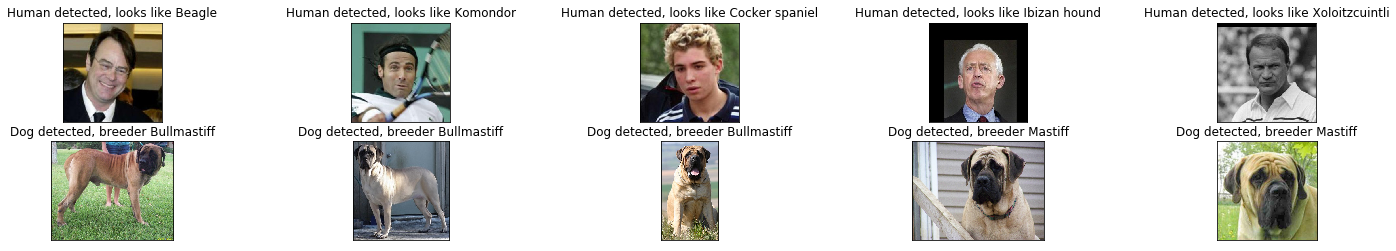

In [23]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
fig = plt.figure(figsize=(25, 4))
idx = 1
for file in np.hstack((human_files[:5], dog_files[:5])):
    cur_img = Image.open(file)
    ax = fig.add_subplot(2, 5, idx, xticks=[], yticks=[])
    plt.imshow(np.asarray(cur_img))
    idx = idx + 1
    thetitle = run_app(file)
    ax.set_title(thetitle)